Test a two-dimensional state space model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matchernet import fn
from matchernet.state_space_model_2d import StateSpaceModel2Dim
from matchernet import utils

Probabilistic nonlinear dynamics model as state space model is:

$\dot{x} = f(x) + dw$

And a stochastic nonlinear observation model is:

$y_t = g(x_t) + w_t$

$ x_t\in\mathbb{R}^{M_X} and y_t\in\mathbb{R}^{M_Y}$ are called state variables and observation variables, respectively. $f(.)$ is a dynamics model and $g(.)$ is an observation model, each given as a known differentiable function.

Furthermore, under a sufficiently small time step $\Delta t$, the state space model is discretely linearized as follows.

$$
x_{t + \Delta t} = F_t x_t + z_t \\
y_{t} = C_t x_t + w_t \\
$$

$ M_X and M_Y $ are the dimensions of the state variable and observation variable, respectively. Where $F_t = I + \Delta t A_t$ and

$$
A_t = \left.\frac{\partial f(x)}{\partial x}\right |_{x = x_t} \\
C_t = \left.\frac{\partial g(x)}{\partial x}\right |_{x = x_t} \\
$$

Are Jacobian matrices for dynamics and observation functions, respectively.
$z_t\sim\mathcal{N}(0, \Sigma_z)$ and $w_t\sim\mathcal{N}(0, \Sigma_w)$ are system noise and observation noise, respectively.

In [2]:
def demo_state_space_model_2dim(n_dim, A, g, sigma_w, sigma_z, x, y, n_steps, dt):
    ssm = StateSpaceModel2Dim(n_dim, A, g, sigma_w, sigma_z, x, y)
    x_series, y_series = ssm.simulation(n_steps, dt)
    
    plt.subplot(211)
    timestamp=np.array(range(0, n_steps))
    plt.plot(timestamp, x_series[:, 0])
    plt.scatter(timestamp, y_series[:, 0], s=1)
    plt.title("test_state_space_model_2Dim")
    plt.ylabel("X")
    plt.subplot(212)
    plt.plot(timestamp, x_series[:, 1])
    plt.scatter(timestamp, y_series[:, 1], s=1)
    plt.ylabel("Y")
    plt.show()

## Experiment

Experiment with 500 steps.

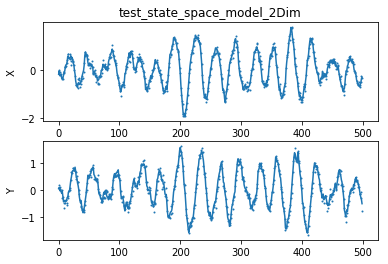

In [4]:
demo_state_space_model_2dim(
    n_dim=2,
    A=np.array([[-0.1, 2], [-2, -0.1]], dtype=np.float32),
    g=fn.LinearFn(utils.zeros(2)),
    sigma_w=0.1,
    sigma_z=0.1,
    x=np.array([0, 0], dtype=np.float32),
    y=utils.zeros((1, 2)),
    n_steps=500,
    dt=0.1
)